In [25]:
from scipy.stats import norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import scipy.stats as stats
import os
from scipy.stats import pearsonr
import seaborn as sns
os.chdir('C:/Users/adamj/Documents/Github/Springboard/NLP Projects/CSV Files')
goodreads=open('Goodreads_preprocessed2.csv','r',encoding='utf8')
goodreads_csv=pd.read_csv(goodreads)

numeric columns: average book rating, total votes, number of pages, 5 star votes, 4 star votes, 3 star votes, 2 star votes, 1 star votes, % 5 star votes, % 4 star votes, % 3 star votes, % 2 star votes, % 1 star votes.

categorical columns: gender, made-into-movie

In [2]:
#Is there a statistical difference in average book ratings between "made into movie" and not? Let's conduct a two-sample t-test.

In [8]:
#separate two groups from data
goodreads_intomovie1 = goodreads_csv[goodreads_csv.into_movie == 1]
goodreads_intomovie0 = goodreads_csv[goodreads_csv.into_movie == 0]

In [9]:
#get description of two groups
print(goodreads_intomovie1.rating.describe())
print('\n')
print(goodreads_intomovie0.rating.describe())

count    1635.000000
mean        3.967462
std         0.279208
min         2.860000
25%         3.810000
50%         3.970000
75%         4.130000
max         5.000000
Name: rating, dtype: float64


count    26211.000000
mean         4.011374
std          0.347737
min          0.000000
25%          3.800000
50%          4.010000
75%          4.210000
max          5.000000
Name: rating, dtype: float64


In [14]:
#difference in mean ratings between made-into-movie versus not?
stats.ttest_ind(goodreads_intomovie1.rating,goodreads_intomovie0.rating,equal_var=False)
#indeed there is

Ttest_indResult(statistic=-6.072400093415213, pvalue=1.5088019131360508e-09)

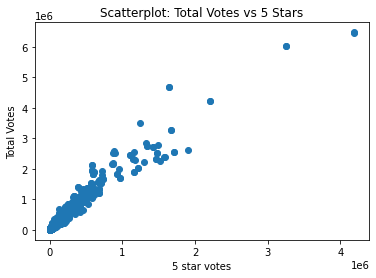

Pearsons correlation: 0.971


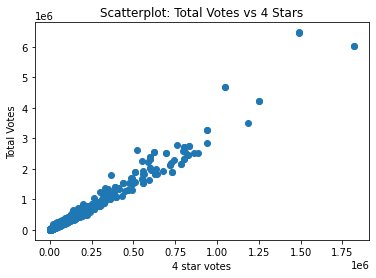

Pearsons correlation: 0.987


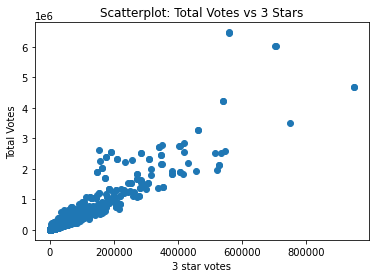

Pearsons correlation: 0.941


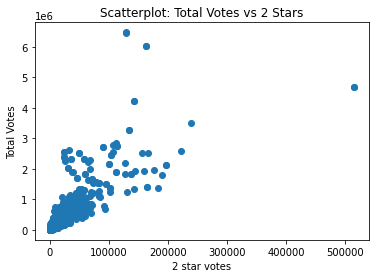

Pearsons correlation: 0.845


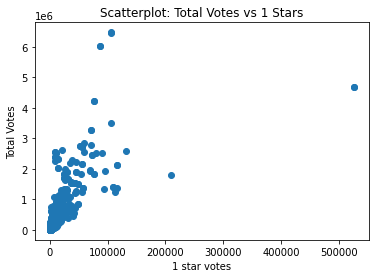

Pearsons correlation: 0.718


In [19]:
#is there a correlation between 5,4,...,1 star votes and total votes?
#scatterplot
plt.scatter(goodreads_csv['5 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("5 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs 5 Stars")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(goodreads_csv['5 star votes'], goodreads_csv['Total Votes'])
print('Pearsons correlation: %.3f' % corr)

#scatterplot
plt.scatter(goodreads_csv['4 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("4 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs 4 Stars")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(goodreads_csv['4 star votes'], goodreads_csv['Total Votes'])
print('Pearsons correlation: %.3f' % corr)

#scatterplot
plt.scatter(goodreads_csv['3 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("3 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs 3 Stars")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(goodreads_csv['3 star votes'], goodreads_csv['Total Votes'])
print('Pearsons correlation: %.3f' % corr)

#scatterplot
plt.scatter(goodreads_csv['2 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("2 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs 2 Stars")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(goodreads_csv['2 star votes'], goodreads_csv['Total Votes'])
print('Pearsons correlation: %.3f' % corr)

#scatterplot
plt.scatter(goodreads_csv['1 star votes'], goodreads_csv['Total Votes'])
plt.xlabel("1 star votes")
plt.ylabel("Total Votes")
plt.title("Scatterplot: Total Votes vs 1 Stars")
plt.show()
# calculate Pearson's correlation
corr, _ = pearsonr(goodreads_csv['1 star votes'], goodreads_csv['Total Votes'])
print('Pearsons correlation: %.3f' % corr)

In [27]:
goodreads_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27846 entries, 0 to 27845
Data columns (total 37 columns):
Unnamed: 0            27846 non-null int64
title                 27846 non-null object
author                27846 non-null object
author_url            27846 non-null object
rating                27846 non-null float64
voters_count          27846 non-null int64
url                   27846 non-null object
into_movie            27846 non-null int64
gender                23049 non-null object
hometown              14698 non-null object
books-num             27846 non-null int64
born-at               7786 non-null object
works-count           27846 non-null int64
publication-date      22732 non-null object
num-pages             24149 non-null float64
popular-shelves       27846 non-null object
rating-dist           27846 non-null object
publisher             23499 non-null object
book-description      27846 non-null object
5 star votes          27846 non-null int64
4 star votes    

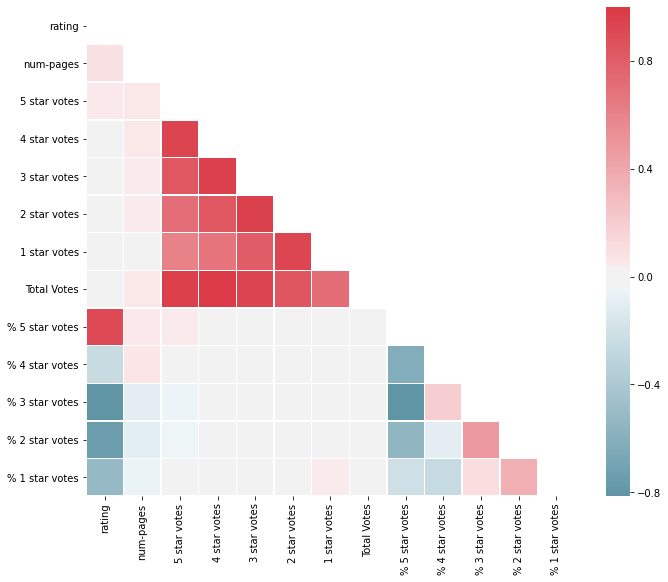

In [36]:
#data frame of just the float64 variables
d = goodreads_csv[['rating','num-pages','5 star votes','4 star votes',
                             '3 star votes','2 star votes','1 star votes',
                             'Total Votes','% 5 star votes','% 4 star votes',
                             '% 3 star votes','% 2 star votes','% 1 star votes']]

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

I’m trying to predict book ratings using the book description. The two most important factors to do that are “Total Votes,” “into movie”, and the numbered votes, probably 5, 4, and 1 stars. If a book has a lot of votes on it, that probably means that it’s good, or else a lot of people wouldn’t have read it. Conversely, if a book was made into a movie, then it was probably good, too. Same logic with if a movie got a lot of 5-star votes, 4-star votes, etc. High star votes probably indicate good book ratings, while low star votes probably indicate low book ratings.

There aren’t that many “groups” in this dataset, other than gender. And they don’t look that different. In addition, the sample size is very big. Any slight difference in means is going to be statistically significant. I did a two-sample t-test on book ratings and yes/no on whether it became a movie anyway. Indeed, there was a statistically significant difference in ratings. Surprisingly though, the books in the “not made into movie” group had the higher ratings. 

There are strong correlations with Total Votes and all X-star votes. However, it is particularly strong with 5-star and 4-star votes.
